In [1]:
import pandas as pd 
import numpy as np 

np.random.seed(42)

num_samples = 100

carbon_emissions = np.random.uniform(50, 400, num_samples)
energy_output = np.random.uniform(100, 1000, num_samples)
renewability_index = np.random.uniform(0, 1, num_samples)
cost_efficiency = np.random.uniform(0.5, 5, num_samples)

In [11]:
sustainability = [
    1 if(emission < 200 and renewability > 0.5 and cost < 3) else 0
    for emission, renewability, cost in zip(carbon_emissions,
                                           renewability_index,
                                           cost_efficiency)
]

In [39]:
data = pd.DataFrame({
    'carbon_emissions' : carbon_emissions,
    'energy_output' : energy_output,
    'renewability_index' : renewability_index,
    'cost_efficiency' : cost_efficiency,
    'sustainability' : sustainability
})

In [41]:
print(data.head())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [43]:
data.to_csv('green_tech_data.csv', index=False)

In [45]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('green_tech_data.csv')
print(data.head())


   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [49]:
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [51]:
data = data.fillna(data.mean(numeric_only=True))

In [53]:
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
print(sustainability)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [67]:
y_pred = model.predict(X_test)

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [71]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.95


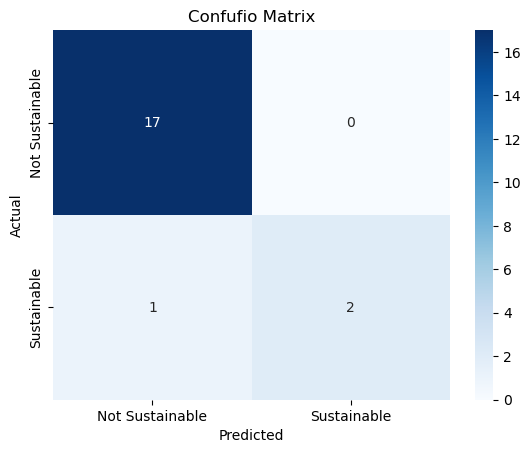

In [77]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Not Sustainable', 'Sustainable'],
           yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confufio Matrix')

plt.show()